In [ ]:
pip install pysd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 52.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 23.3 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=34c8401dc6e3112976f4260b04b9f0f0ffd80a941b485cafb025832a14525906
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pickle
import pandas as pd
import sqlite3
import numpy as np
%pylab inline
import pysd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Populating the interactive namespace from numpy and matplotlib


In [ ]:
model = pysd.read_vensim('/content/drive/MyDrive/Yannis/Systems Dynamics/SIR.mdl')

In [ ]:
res = model.run(params={'Infectivity': 0.02})

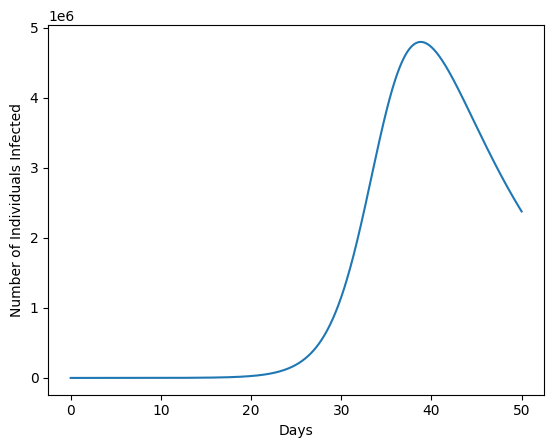

In [ ]:
res['Infected'].plot()
plt.xlabel('Days')
plt.ylabel('Number of Individuals Infected');

In [ ]:
peak_value = res['Infected'].max()

print('Up to', int(peak_value), 'individuals are infected at one time.')

Up to 4798396 individuals are infected at one time.


In [ ]:
import numpy as np
infectivity_values = np.arange(.005, .105, .005)
print(infectivity_values)

[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06
 0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1  ]


In [ ]:
peak_value_list = []

for inf in infectivity_values:
    res = model.run(params={'Infectivity': inf})
    peak_value_list.append(res['Infected'].max())

peak_value_list

[34.86810210467729,
 17376.295842009604,
 3127287.127264763,
 4798396.222053367,
 5490586.578913281,
 6007712.289673515,
 6410082.172490937,
 6733269.976059377,
 6999008.729515837,
 7221809.038370998,
 7412060.684035444,
 7576357.8468962945,
 7719951.693505733,
 7846142.103150383,
 7958727.643037483,
 8060110.328538261,
 8150974.284047906,
 8233434.777704702,
 8308822.446865912,
 8377904.218632583]

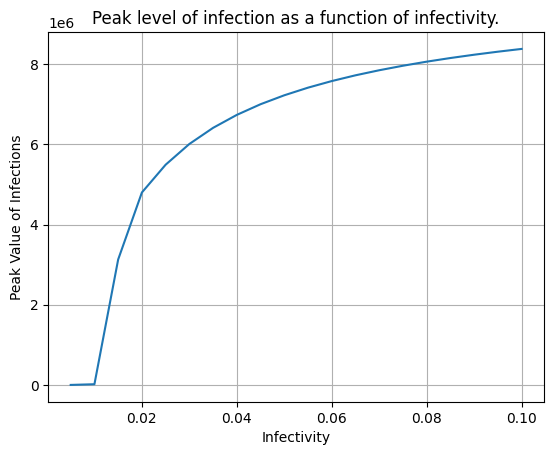

In [ ]:
plt.plot(infectivity_values, peak_value_list)
plt.grid()
plt.xlabel('Infectivity')
plt.ylabel('Peak Value of Infections')
plt.title('Peak level of infection as a function of infectivity.');

1- Identify the first day that the base might not be able to evacuate, for any value of infectivity.

2- Identify the maximum total number of days that the base might be unable to evacuate, for the range of values of infectivity listed above.

3- Come up with a better story for this example than 'penguin foot'.

1 - Find the first day where the number of infected individuals exceeds half the base’s population (500 individuals) since each snow machine requires a driver.

In [ ]:
first_day_cannot_evacuate = []

for inf in infectivity_values:
    res = model.run(params={'Infectivity': inf})
    # Identify the first day where the number of infected is greater than 500
    first_day = res[res['Infected'] > 500].index.min()
    first_day_cannot_evacuate.append(first_day)

print(first_day_cannot_evacuate)


[nan, 26.25, 14.375, 9.9375, 7.625, 6.1875, 5.1875, 4.5, 4.0, 3.5625, 3.25, 2.9375, 2.6875, 2.5, 2.375, 2.1875, 2.0625, 2.0, 1.875, 1.75]


The nan value for the first entry indicates that the number of infected individuals never exceeds 500 when the infectivity is at its lowest (0.005), meaning the base can always evacuate. As the infectivity increases, the number of days it takes to reach the threshold of 500 infected individuals decreases, which is reflected in the numbers you see.

This is expected because a higher infectivity means the disease spreads faster among the population, reducing the number of days before the critical threshold is reached where not enough people are available to operate the snow machines.

In [ ]:
days_above_threshold = []

for inf in infectivity_values:
    res = model.run(params={'Infectivity': inf})
    # Count days where the number of infected is greater than 500
    days_unable = res[res['Infected'] > 500].shape[0]
    days_above_threshold.append(days_unable)

print(days_above_threshold)

[0, 381, 571, 642, 679, 702, 718, 729, 737, 744, 749, 754, 758, 761, 763, 766, 768, 769, 771, 773]


Great, those results look consistent with the behavior expected from an infectious disease model under varying infectivity rates. The numbers represent the total days the base remains unable to evacuate because the number of infected individuals is above 500, for each respective infectivity value.